### Importing the data and libraries

In [1]:
# Importing the libraries
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Importing the data
df_calendario = pd.read_csv('../data/calendar.csv')
df_listin = pd.read_csv('../data/listings.csv')
df_reviews = pd.read_csv('../data/reviews.csv')

### Data Understanding

In [3]:
# Checking the shape of dataframes
print(df_calendario.shape)
print(df_listin.shape)
print(df_reviews.shape)

(9623164, 7)
(26366, 75)
(458439, 6)


In [4]:
# Checking the values
df_calendario.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,53344884,2022-09-22,t,"$3,500.00","$3,500.00",3.0,365.0
1,53344884,2022-09-23,t,"$3,500.00","$3,500.00",3.0,365.0
2,53344884,2022-09-24,t,"$3,500.00","$3,500.00",3.0,365.0
3,53344884,2022-09-25,t,"$3,500.00","$3,500.00",3.0,365.0
4,53344884,2022-09-26,t,"$3,500.00","$3,500.00",3.0,365.0


In [5]:
# Checking the values
df_listin.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53344884,https://www.airbnb.com/rooms/53344884,20220921172238,2022-09-22,city scrape,Suntuoso apartamento em Copacabana posto 6,suntuoso apartamento de frente para o mar <br ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,431412286,...,NaN,NaN,NaN,NaN,t,10,8,2,0,NaN
1,7801456,https://www.airbnb.com/rooms/7801456,20220921172238,2022-09-22,city scrape,Ipanema Vieira Souto - Linda Vista,Flat luxuoso com a melhor localização do Rio d...,"Ipanema é considerado o berço do rio, cheio de...",https://a0.muscache.com/pictures/99276394/dc9c...,40650139,...,NaN,NaN,NaN,NaN,t,5,5,0,0,NaN
2,14333905,https://www.airbnb.com/rooms/14333905,20220921172238,2022-09-22,city scrape,Casa compartilhada,"A 15 min. do complexo esportivo de Deodoro, Ca...",NaN,https://a0.muscache.com/pictures/15235501-16c4...,87749071,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
3,44708736,https://www.airbnb.com/rooms/44708736,20220921172238,2022-09-22,city scrape,Aluguel de Lancha no Rio de Janeiro,Iate Intermarine 440 Full Gold c/ Fly p/ até 1...,A Marina da Glória fica no bairro do Flamengo ...,https://a0.muscache.com/pictures/210e9877-2854...,97164727,...,5.0,5.0,5.0,NaN,f,2,2,0,0,0.1
4,35351763,https://www.airbnb.com/rooms/35351763,20220921172238,2022-09-22,city scrape,Uma grande família,"Estou oferecendo minha casa ,minha família meu...",São Mateus,https://a0.muscache.com/pictures/44713611-925b...,249666532,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [6]:
# Checking the values
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r<b...
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...


In [7]:
# Checking the values
df_calendario.date.describe

<bound method NDFrame.describe of 0          2022-09-22
1          2022-09-23
2          2022-09-24
3          2022-09-25
4          2022-09-26
              ...    
9623159    2023-09-16
9623160    2023-09-17
9623161    2023-09-18
9623162    2023-09-19
9623163    2023-09-20
Name: date, Length: 9623164, dtype: object>

In [8]:
# Checking the columns
df_listin.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

- <b>df_calendario:</b> In this dataset we have future dates, showing which days the place will be available for rent and which days it is already booked until the date of 2023-09-20. Together, we also have some features, such as the minimum and maximum number of days to rent and the rent amount.

- <b>df_listin:</b> In this dataset we have information about the places, such as number of rooms, average grade, location, neighborhood and information that is also in the df_calendario.

- <b>df_review:</b> In this dataset we have reviews from people who have already rented the place.

From this, some questions arise:

- Which areas of Rio de Janeiro have the highest ratings?

- What are the most common words in reviews?

- How is the vacancy situation for the year 2023, are there already many rental reservations or not? On which days?

### EDA

#### 1. Which areas of Rio de Janeiro have the highest ratings?

In [9]:
# Getting center coordinates
rj_coordinates = (df_listin.latitude.mean(), df_listin.longitude.mean())

In [10]:
# Creating the map
map_rj = folium.Map(location=rj_coordinates, zoom_start=10)

In [11]:
# Shading the areas
heatmap = HeatMap(data=df_listin[['latitude', 'longitude', 'review_scores_rating']].groupby(['latitude', 'longitude']).mean().dropna().reset_index().values.tolist(), radius=11, max_zoom=13)
heatmap.add_to(map_rj)

In [12]:
# Checking the final result
map_rj

- The waterfront area usually has better scores than places farther from the beach.

#### 2. What are the most common words in reviews?

In [13]:
# Checking for missing values
df_reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         10
dtype: int64

In [14]:
# Dropping the missing values
df_review_droppedNan = df_reviews.dropna()

In [15]:
# Putting together the words of the reviews
summary = " ".join(s for s in df_review_droppedNan.comments)

In [16]:
# Creating a set of words that will be excluded
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "é", 'br'])

In [17]:
# Creating the word cloud
img_wordcloud = WordCloud(stopwords=stopwords,
                          background_color='black',
                          width=1600,
                          height=800).generate(summary)

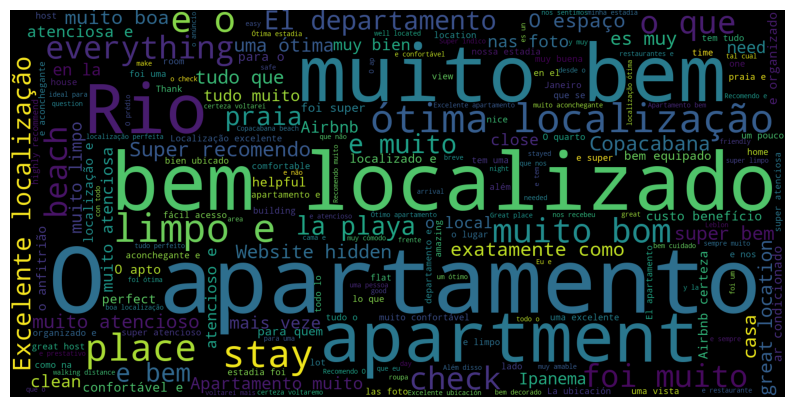

In [18]:
# Plotting the word cloud
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(img_wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(img_wordcloud)

From this word cloud we can see the following things from the reviews:

- Natives from countries that speak Portuguese, English or Spanish are common.
- The cleanliness and organization of the properties are usually praised.
- The location is also often praised, perhaps related to the beach and the view, which also appear in the word cloud.

#### 3. How is the vacancy situation for the year 2023, are there already many rental reservations or not? On which months?

In [19]:
# Checking the info about the dataframe
df_calendario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9623164 entries, 0 to 9623163
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 513.9+ MB


In [20]:
# Changing the data type
df_calendario['date'] = pd.to_datetime(df_calendario.date)

In [21]:
# Selecting data for 2023
df_2023 = df_calendario[df_calendario.date.dt.year == 2023]

In [22]:
# Checking the min
df_2023.date.min()

Timestamp('2023-01-01 00:00:00')

In [23]:
# Checking the max
df_2023.date.max()

Timestamp('2023-10-01 00:00:00')

In [24]:
# Grouping data
df_aval_2023 = df_2023.groupby('listing_id').available.value_counts().to_frame()
df_aval_2023.rename(columns={'available':'days'}, inplace = True)
df_aval_2023.reset_index(inplace=True)

In [30]:
# Checking the shape of unavailable places
df_aval_2023[df_aval_2023.available == 'f'].shape[0]

19251

- January to October has 273 days.
- For at least 1 day, 19251 different appointments have already been made for the year 2023.

In [26]:
# Copying the dataset
df_2023_day = df_2023

In [27]:
# Adding a new variable
df_2023_day['day'] = df_2023_day.date.dt.day

C:\Users\Daniel\AppData\Local\Temp\ipykernel_5640\4258845798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_day['day'] = df_2023_day.date.dt.day


In [28]:
# Grouping the data
df_t = df_2023.groupby([df_2023.date]).available.value_counts().to_frame()
df_t = df_t.rename(columns={'available':'qtd'})
df_t.reset_index(inplace=True)

(array([19358., 19389., 19417., 19448., 19478., 19509., 19539., 19570.,
        19601., 19631.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19389.0, 0, '2023-02'),
  Text(19417.0, 0, '2023-03'),
  Text(19448.0, 0, '2023-04'),
  Text(19478.0, 0, '2023-05'),
  Text(19509.0, 0, '2023-06'),
  Text(19539.0, 0, '2023-07'),
  Text(19570.0, 0, '2023-08'),
  Text(19601.0, 0, '2023-09'),
  Text(19631.0, 0, '2023-10')])

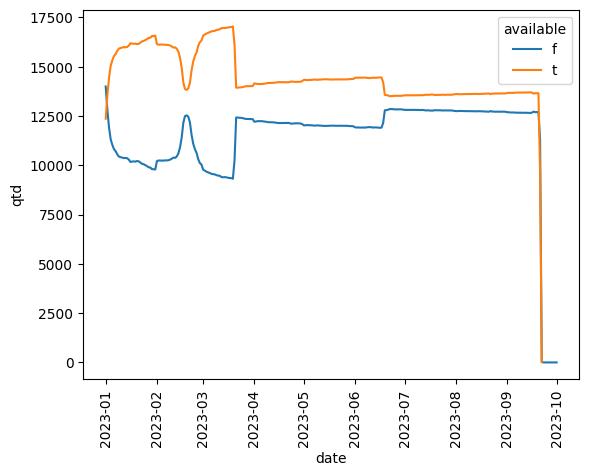

In [29]:
# Plotting a graph
sns.lineplot(data = df_t, x = 'date', y = 'qtd', hue = 'available')
plt.xticks(rotation = 90)

- At the beginning of January, we can see that there is a drop in bookings, most likely because a lot of people go to Rio de Janeiro to celebrate the new year.
- There is another sharp increase in bookings between February and March, which must be due to Carnival.
- There is another increase between the end of March and the beginning of April, which is when the festivities of All Saints in Brazil begin and also when Cold Play shows will take place, on the 25th, 26th and 28th of March.